#BERT model:

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/merged_dataset (1).csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,extracted_text,labels
0,0,0,-|PROJECT TITLE: | RELIANCE PETROLEUM LIMITED ...,0
1,1,1,Pp 33 1 [CUSTOMER RELIANCE INDUSTRIES LIMITED ...,0
2,2,2,P26 J a Oil Pump Motor Data Sheet 4D1JCR-MCC01...,0
3,3,3,RELIANCE PROJECT TITLE : RELIANCE PETROLEUM LI...,0
4,4,4,CLIENT: RELIANCE INDUSTRIES LIMITED PROJECT TI...,0


In [ ]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)

In [ ]:
df = df.sample(frac=1)

In [ ]:
df.head()

,extracted_text,labels
249,G41-RF Z418-014 ‘vimal.sabhaya USERNAME PLOT D...,1
242,MP-RFZ418-P13A/B NOTES 59 PENTANE REPROCESSING...,1
195,LEGEND :- PIPING SPECIFICATION TERMINATION POI...,1
38,is nea Racin bmn i cs ane ORL EEE OBIS Fo rorc...,0
94,TECHNICAL DATA SHEET FOR BATTERY CHARGER AND D...,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['extracted_text'],df['labels'], stratify=df['labels'])
X_train.head(4)

174    FIRST ANGLE PROJECTION GREASE INLET THE INFORM...
167    Cc typ Ja [at [b [bi [ct[dJe Jet {f [iifg Jot{...
181    LIST OF RELATED DRAWINGS SR. NO. DRG. NO. REV....
118    EQPT NAME-CRUDE/TOP PUMPAROUNDEXCHANGER sees E...
Name: extracted_text, dtype: object

In [ ]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

213 71 213 71


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.8 MB/s eta 0:00:00


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])

In [ ]:
output = tf.keras.layers.Dense(256,activation='relu')(outputs['pooled_output'])
output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Dense(32,activation='relu')(output)
output = tf.keras.layers.Dense(3,activation='sigmoid')(output)

In [ ]:
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(outputs['pooled_output'])
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size = 32)

Epoch 1/15
7/7 [==============================] - 23s 645ms/step - loss: 1.1895 - accuracy: 0.4178
Epoch 2/15
7/7 [==============================] - 4s 537ms/step - loss: 1.0011 - accuracy: 0.5070
Epoch 3/15
7/7 [==============================] - 3s 368ms/step - loss: 0.9723 - accuracy: 0.5305
Epoch 4/15
7/7 [==============================] - 3s 365ms/step - loss: 0.9659 - accuracy: 0.5258
Epoch 5/15
7/7 [==============================] - 3s 417ms/step - loss: 0.8518 - accuracy: 0.6150
Epoch 6/15
7/7 [==============================] - 3s 368ms/step - loss: 0.8183 - accuracy: 0.6385
Epoch 7/15
7/7 [==============================] - 3s 367ms/step - loss: 0.8122 - accuracy: 0.6197
Epoch 8/15
7/7 [==============================] - 3s 366ms/step - loss: 0.7899 - accuracy: 0.6056
Epoch 9/15
7/7 [==============================] - 3s 371ms/step - loss: 0.6958 - accuracy: 0.7136
Epoch 10/15
7/7 [==============================] - 3s 428ms/step - loss: 0.6625 - accuracy: 0.7277
Epoch 11/15
7/7 [=

In [ ]:
y_test

60     0
104    2
21     0
80     0
145    2
      ..
273    1
177    2
150    2
251    1
208    1
Name: labels, Length: 71, dtype: int64

In [ ]:
y_predicted = model.predict(X_test)

3/3 [==============================] - 2s 299ms/step


#BASE LINE MODEL:

## Read and Split the data:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd

In [ ]:
df = pd.read_csv('/content/merged_dataset (1).csv')

In [ ]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)

In [ ]:
df = df.sample(frac=1)

In [ ]:
df.head()

,extracted_text,labels
163,"12 ""i 10 9 8 7 5 4 3 2 Z 100 i 6000 _ TUBE LEN...",2
201,STEAM INLET STEAM EXHAUST WITHIN CONFINES OF C...,1
271,NOTE: THE INFORMATION IN THIS DOCUMENT IS CONF...,1
16,RELIANCE PROJECT TITLE: RELIANCE PETROLEUM LIM...,0
92,TECHNICAL DATA SHEET FOR BATTERY CHARGER AND D...,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['extracted_text'].to_numpy(),df['labels'].to_numpy(),test_size=0.2)

## Model Base:

In [ ]:
#tokenizing the text input into numert\ical input:
#CONVERTING THE TEXT INTO NUMBER
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import TextVectorization
# vertored_outputs = TextVectorization()
text_vectorizer = TextVectorization(max_tokens =None,standardize="lower_and_strip_punctuation",split ="whitespace",ngrams=None,output_mode='int',output_sequence_length =None)

In [ ]:
sum(len(X_train[i]) for i in range(len(X_train)))/len(X_train)

4288.859030837004

In [ ]:
#find the average lenght of the each sentance:
round(sum(len([i]) for i in range(len(X_train)))/len(X_train))
round(sum(len(X_train[i]) for i in range(len(X_train)))/len(X_train))

4289

In [ ]:
text_vectorizer = TextVectorization(max_tokens=10000,output_sequence_length=20)

In [ ]:
text_vectorizer.adapt(X_train)

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
words_in_vocab[1:100]

['[UNK]',
 'a',
 'of',
 '2',
 'no',
 'for',
 '1',
 'x',
 '3',
 'i',
 'be',
 'to',
 '4',
 'and',
 '7',
 '5',
 '—',
 'shall',
 'as',
 '8',
 's',
 'the',
 'o',
 'in',
 '6',
 'ee',
 'note',
 'detail',
 'e',
 'with',
 'by',
 'is',
 'all',
 'from',
 'on',
 't',
 'or',
 'oo',
 '0',
 'at',
 'ae',
 'thk',
 '10',
 'see',
 'design',
 '9',
 'per',
 'b',
 'shell',
 'f',
 'j',
 'ss',
 'l',
 'plate',
 '12',
 'g',
 'sa',
 'project',
 'c',
 'mm',
 'nozzle',
 'oe',
 'not',
 'valve',
 'document',
 '16',
 'z',
 '15',
 '©',
 'se',
 'pressure',
 'rf',
 'y',
 'n',
 'are',
 '°',
 '20',
 'type',
 'rev',
 'drawing',
 'weld',
 'name',
 'pump',
 'tube',
 'flange',
 '14',
 'test',
 'pipe',
 '25',
 '13',
 'asme',
 'date',
 'an',
 'es',
 'os',
 'proceed',
 'sheet',
 'equipment',
 'reliance']

In [ ]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = 10000,output_dim=128,input_length=20)

In [ ]:
print(X_train[50])
print(text_vectorizer(X_train[50]))
print(embedding(text_vectorizer(X_train[50])))

DOCUMENT FRONT SHEET: FLOWSERVE REF: FLOWSERVE PUM = [ee en Feoverrnoccoms [=| v8 [Renee feecrer cavesorveope: [= fU OF DOCUMENT TITLE: p= | Pump Data Sheets cor ee ee a i amr [=| TTT BECHTEL SEQUENCE No.: EQUIPMENT TAG No: } MP-RF414-P04A/B STATUS CODE: | CustomerENG: | DATE: RETURN DATE: | REJECTED RELEASE TO MANUFACTURE MUST BE GIVEN IN WRITING BY THE BUYER. [EET |e uct Toncomonaronorcomwers WORK MAY PROCEED SUBJECT TO INCORPORATION OF COMMENTS. ACCEPTABLE INCORPORATE COMMENTS - iF ANY. RESUBBMIT AS CERTIFIED FINAL’. WORK MAY PROCEED. NO COMMENTS ACCEPTABLE. CERTIFIED FINAL ISSUE. DO NOT RESUBMIT. WORK MAY PROCEED INFORMATION ONLY ACCEPTED FOR INFORMATION ONLY. DO NOT RESUBMIT. WORK MAY PROCEED. COMMENT / APPROVAL STAMP SPACE PREPARED BY: G. WHEATLEY 14/01/04 14:31 PAGE 10OF1
tf.Tensor(
[  65 2676   97 8482  330 8482    1   26  255    1 6543 3973    1    1
 1879    3   65  137  116   83], shape=(20,), dtype=int64)
tf.Tensor(
[[-0.01765738  0.00312681  0.01716299 ...  0.01917814 -0.0

In [ ]:
print(embedding(text_vectorizer(X_train[50]))[0].shape)

(128,)


In [ ]:
#model 0: getting a baseline:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline(
    [("tfidf",TfidfVectorizer()),
     ("clf",MultinomialNB())]

)

model_0.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(X_test,y_test)
print(baseline_score)

0.8947368421052632


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,model_0.predict(X_test)))

[[12  0  1]
 [ 2 19  0]
 [ 2  1 20]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.95      0.90      0.93        21
           2       0.95      0.87      0.91        23

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.91      0.89      0.90        57



## Dense networks:

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.3 MB/s eta 0:00:00


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
from tensorflow.keras.layers import TextVectorization
# text_vectorizer = TextVectorization(max_tokens =None,standardize="lower_and_strip_punctuation",split ="whitespace",ngrams=None,output_mode='int',output_sequence_length =None)
text_vectorizer = TextVectorization(max_tokens=10000,output_sequence_length=50)
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = 10000,output_dim=128,input_length=50)

In [ ]:
#model 1 FEED FORWARD NEURAL NETWORK MODEL:
# building using functional API:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3,activation="softmax")(x)

model_1 = tf.keras.Model(inputs,outputs,name='base_model_1')

In [ ]:
model_1.summary()

Model: "base_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 50)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1280387 (4.88 MB)
Trainable params: 1280

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(),loss = "sparse_categorical_crossentropy"  ,metrics=["accuracy"])

In [ ]:
model_1.fit(X_train.reshape([-1,1]),y_train.reshape([-1,1]),epochs = 15)

Epoch 1/15


FailedPreconditionError: Graph execution error:

Detected at node base_model_1/text_vectorization/string_lookup/None_Lookup/LookupTableFindV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-ecd297eb5f95>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/text_vectorization.py", line 632, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 754, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 792, in _lookup_dense

Detected at node base_model_1/text_vectorization/string_lookup/None_Lookup/LookupTableFindV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-ecd297eb5f95>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/text_vectorization.py", line 632, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 754, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 792, in _lookup_dense

2 root error(s) found.
  (0) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node base_model_1/text_vectorization/string_lookup/None_Lookup/LookupTableFindV2}}]]
	 [[gradient_tape/base_model_1/embedding/embedding_lookup/Size/_26]]
  (1) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node base_model_1/text_vectorization/string_lookup/None_Lookup/LookupTableFindV2}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_844]

## Universal_Sentence_Encoder:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_df = pd.read_csv('/content/merged_dataset (1).csv')
train_df_shuffled = train_df.sample(frac=1)
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["extracted_text"].to_numpy(),
                                                                            train_df_shuffled["labels"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3740297775781945830
xla_global_id: -1
]


In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [ ]:
import tensorflow as tf
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=True, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
from tensorflow.keras import layers
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(3, activation="softmax")
], name="model_6_USE")

# Compile model
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 256830851 (979.73 MB)
Trainable params: 256830851 (979.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=15,
                              validation_split=0.2)

Epoch 1/15
7/7 [==============================] - 58s 6s/step - loss: 1.0209 - accuracy: 0.6127 - val_loss: 0.8963 - val_accuracy: 0.9020
Epoch 2/15
7/7 [==============================] - 42s 6s/step - loss: 0.7803 - accuracy: 0.9363 - val_loss: 0.7224 - val_accuracy: 0.8431
Epoch 3/15
7/7 [==============================] - 41s 6s/step - loss: 0.5393 - accuracy: 0.9559 - val_loss: 0.5802 - val_accuracy: 0.8431
Epoch 4/15
7/7 [==============================] - 42s 6s/step - loss: 0.3071 - accuracy: 0.9902 - val_loss: 0.4254 - val_accuracy: 0.9020
Epoch 5/15
7/7 [==============================] - 43s 6s/step - loss: 0.1550 - accuracy: 1.0000 - val_loss: 0.3678 - val_accuracy: 0.9020
Epoch 6/15
7/7 [==============================] - 42s 6s/step - loss: 0.0777 - accuracy: 1.0000 - val_loss: 0.3849 - val_accuracy: 0.8824
Epoch 7/15
7/7 [==============================] - 42s 6s/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.3750 - val_accuracy: 0.9020
Epoch 8/15
7/7 [==================

In [ ]:
import numpy as np
y_preds = []
for i in model_6.predict(val_sentences):
  y_preds.append(np.argmax(i))
y_preds

1/1 [==============================] - 1s 1s/step


[2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 2]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_labels,y_preds)

array([[10,  0,  0],
       [ 1,  7,  1],
       [ 1,  0,  9]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_labels,y_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.78      0.88         9
           2       0.90      0.90      0.90        10

    accuracy                           0.90        29
   macro avg       0.91      0.89      0.89        29
weighted avg       0.91      0.90      0.90        29



In [ ]:
train_labels

array([0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0,
       2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1])

# LayoutLM model cells:

In [ ]:
from transformers import LayoutLMv3Config, LayoutLMv3Model

# Initializing a LayoutLMv3 microsoft/layoutlmv3-base style configuration
configuration = LayoutLMv3Config()

# Initializing a model (with random weights) from the microsoft/layoutlmv3-base style configuration
model = LayoutLMv3Model(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
print(model)

LayoutLMv3Model(
  (embeddings): LayoutLMv3TextEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (position_embeddings): Embedding(512, 768, padding_idx=1)
    (x_position_embeddings): Embedding(1024, 128)
    (y_position_embeddings): Embedding(1024, 128)
    (h_position_embeddings): Embedding(1024, 128)
    (w_position_embeddings): Embedding(1024, 128)
  )
  (patch_embed): LayoutLMv3PatchEmbeddings(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (encoder): LayoutLMv3Encoder(
    (layer): ModuleList(
      (0-11): 12 x LayoutLMv3Layer(
        (attention): Layo

In [ ]:
!pip install pytesseract

In [ ]:
!pip install datasets
from datasets import Dataset, Features, Sequence, ClassLabel, Value, Array2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
import os

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

import pytesseract
from PIL import Image, ImageDraw, ImageFont

import torch
from datasets import Dataset, Features, Sequence, ClassLabel, Value, Array2D
from transformers import LayoutLMTokenizer, LayoutLMForSequenceClassification, AdamW

In [ ]:
!unzip -d '/content/' '/content/drive/MyDrive/LabellingImages.zip'

In [ ]:
dataset_path = "/content/LabellingImages"
labels = [label for label in os.listdir(dataset_path)]
idx2label = {v: k for v, k in enumerate(labels)}
label2idx = {k: v for v, k in enumerate(labels)}
label2idx

{'EngDwg': 0, 'PnI': 1, 'Datasheet': 2}

In [ ]:
images = []
labels = []

for label in os.listdir(dataset_path):
    images.extend([
        f"{dataset_path}/{label}/{img_name}" for img_name in os.listdir(f"{dataset_path}/{label}")
    ])
    labels.extend([
        label for _ in range(len(os.listdir(f"{dataset_path}/{label}")))
    ])
data = pd.DataFrame({'image_path': images, 'label': labels})

train_data, valid_data = train_test_split(data, test_size=0.09, random_state=0, stratify=data.label)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
print(f"{len(train_data)} training examples, {len(valid_data)} validation examples")
data.head()

262 training examples, 27 validation examples


,image_path,label
0,/content/LabellingImages/EngDwg/dw92.jpg,EngDwg
1,/content/LabellingImages/EngDwg/dw76.jpg,EngDwg
2,/content/LabellingImages/EngDwg/dw2.jpg,EngDwg
3,/content/LabellingImages/EngDwg/dw46.jpg,EngDwg
4,/content/LabellingImages/EngDwg/dw28.jpg,EngDwg


In [ ]:
def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

In [ ]:
def apply_ocr(example):
        # get the image
        image = Image.open(example['image_path'])

        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))

        # add as extra columns
        assert len(words) == len(boxes)
        example['words'] = words
        example['bbox'] = boxes
        return example

In [ ]:
def encode_training_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
    words = example['words']
    normalized_word_boxes = example['bbox']

    assert len(words) == len(normalized_word_boxes)

    token_boxes = []
    for word, box in zip(words, normalized_word_boxes):
        word_tokens = tokenizer.tokenize(word)
        token_boxes.extend([box] * len(word_tokens))

    # Truncation of token_boxes
    special_tokens_count = 2
    if len(token_boxes) > max_seq_length - special_tokens_count:
        token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]

    # add bounding boxes of cls + sep tokens
    token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]

    encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
    # Padding of token_boxes up the bounding boxes to the sequence length.
    input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
    padding_length = max_seq_length - len(input_ids)
    token_boxes += [pad_token_box] * padding_length
    encoding['bbox'] = token_boxes
    encoding['label'] = label2idx[example['label']]


    assert len(encoding['input_ids']) == max_seq_length
    assert len(encoding['attention_mask']) == max_seq_length
    assert len(encoding['token_type_ids']) == max_seq_length
    assert len(encoding['bbox']) == max_seq_length

    return encoding


In [ ]:
# we need to define the features ourselves as the bbox of LayoutLM are an extra feature
training_features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(names=list(idx2label.keys())),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})

In [ ]:
def training_dataloader_from_df(data):
    dataset = Dataset.from_pandas(data)
    dataset = dataset.map(apply_ocr)

    encoded_dataset = dataset.map(
        lambda example: encode_training_example(example), features=training_features
    )
    encoded_dataset.set_format(
        type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label']
    )
    dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=1, shuffle=True)
    batch = next(iter(dataloader))
    return dataloader


In [ ]:
tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,343 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
train_dataloader = training_dataloader_from_df(train_data)
valid_dataloader = training_dataloader_from_df(valid_data)

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device);

model.safetensors:   0%|          | 0.00/453M [00:00<?, ?B/s]

Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'layoutlm.embeddings.word_embeddings.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = AdamW(model.parameters(), lr=4e-5)
num_epochs = 3


for epoch in range(num_epochs):
    print("Epoch:", epoch)
    training_loss = 0.0
    training_correct = 0
    #put the model in training mode
    model.train()
    for batch in tqdm(train_dataloader):
        labels = batch["label"].to(device)
        outputs = model(
            input_ids=batch["input_ids"].to(device), bbox=batch["bbox"].to(device),
            attention_mask=batch["attention_mask"].to(device),
            token_type_ids=batch["token_type_ids"].to(device),
            labels=labels
        )
        loss = outputs.loss

        training_loss += loss.item()
        predictions = outputs.logits.argmax(-1)
        training_correct += (predictions == labels).float().sum()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print("Training Loss:", training_loss / batch["input_ids"].shape[0])
    training_accuracy = 100 * training_correct / len(train_data)
    print("Training accuracy:", training_accuracy.item())

    validation_loss = 0.0
    validation_correct = 0
    for batch in tqdm(valid_dataloader):
        labels = batch["label"].to(device)
        outputs = model(
            input_ids=batch["input_ids"].to(device), bbox=batch["bbox"].to(device),
            attention_mask=batch["attention_mask"].to(device),
            token_type_ids=batch["token_type_ids"].to(device),
            labels=labels
        )
        loss = outputs.loss

        validation_loss += loss.item()
        predictions = outputs.logits.argmax(-1)
        validation_correct += (predictions == labels).float().sum()

    print("Validation Loss:", validation_loss / batch["input_ids"].shape[0])
    validation_accuracy = 100 * validation_correct / len(valid_data)
    print("Validation accuracy:", validation_accuracy.item())

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch: 0


NameError: name 'train_dataloader' is not defined

#DONUT:

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset

dataset = load_dataset("/content/drive/MyDrive/LabellingImages/data", split="train")

Resolving data files:   0%|          | 0/285 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 285
})

In [ ]:
import os
parent,filesss,files = next(os.walk('/content/drive/MyDrive/LabellingImages/data/PnI/'))
print(parent,filesss,len(files))
parent,filesss,files = next(os.walk('/content/drive/MyDrive/LabellingImages/data/EngDwg/'))
print(parent,filesss,len(files))
parent,filesss,files = next(os.walk('/content/drive/MyDrive/LabellingImages/data/Datasheet/'))
print(parent,filesss,len(files))

/content/drive/MyDrive/LabellingImages/data/PnI/ [] 97
/content/drive/MyDrive/LabellingImages/data/EngDwg/ [] 91
/content/drive/MyDrive/LabellingImages/data/Datasheet/ [] 97


In [ ]:
train_datasets, test_datasets = [], []

id2label = {
  0: "Datasheet",
  1: "EngDwg",
  2: "PnI"
}

def check_label(examples, label_index):
  booleans = []
  for label in examples['label']:
    try:
      if label == label_index:
        booleans.append(True)
      else:
        booleans.append(False)
    except:
      booleans.append(False)

  return booleans

# for each class: filter the dataset on documents with that class
# and then use the first 10 for training, and the last 10 for testing
for id in id2label.keys():
  # filter dataset on particular label
  filtered_dataset = dataset.filter(check_label, fn_kwargs={'label_index':id}, batched=True)
  # select first 10 examples for training
  filted_train_dataset = filtered_dataset.select(range(80))
  train_datasets.append(filted_train_dataset)
  # select last 10 examples for testing
  filted_test_dataset = filtered_dataset.select(range(80, 91))
  test_datasets.append(filted_test_dataset)

Filter:   0%|          | 0/285 [00:00<?, ? examples/s]

Filter:   0%|          | 0/285 [00:00<?, ? examples/s]

Filter:   0%|          | 0/285 [00:00<?, ? examples/s]

In [ ]:
train_datasets

[Dataset({
     features: ['image', 'label'],
     num_rows: 80
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 80
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 80
 })]

In [ ]:
test_datasets

[Dataset({
     features: ['image', 'label'],
     num_rows: 11
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 11
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 11
 })]

In [ ]:
from datasets import DatasetDict, concatenate_datasets

toy_dataset = DatasetDict({"train": concatenate_datasets(train_datasets),
                           "test": concatenate_datasets(test_datasets)
                           })

In [ ]:
toy_dataset["test"][29]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=9536x6736>,
 'label': 2}

In [ ]:
template = '{"gt_parse": {"class" : '

In [ ]:

id2label = {
  0: "Datasheet",
  1: "EngDwg",
  2: "PnI"
}



def update_examples(examples):
  ground_truths = []
  for label in examples['label']:
    ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

  examples['ground_truth'] = ground_truths

  return examples

toy_dataset = toy_dataset.map(update_examples, batched=True)

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Map:   0%|          | 0/33 [00:00<?, ? examples/s]

In [ ]:
toy_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 240
    })
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 33
    })
})

In [ ]:
example = toy_dataset['train'][21]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2380x3368>,
 'label': 0,
 'ground_truth': '{"gt_parse": {"class" : "Datasheet"}}'}

In [ ]:
toy_dataset['test'][20]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=9536x6736>,
 'label': 1,
 'ground_truth': '{"gt_parse": {"class" : "EngDwg"}}'}

In [ ]:
from ast import literal_eval

literal_eval(example["ground_truth"])['gt_parse']

{'class': 'Datasheet'}

##Training Data:

In [ ]:
from transformers import VisionEncoderDecoderConfig

max_length = 8
# image_size = [2560, 1920]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

In [ ]:

from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

preprocessor_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:

# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:190: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [ ]:
len(processor.tokenizer)

57525

In [ ]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))

In [ ]:

additional_tokens = ["", "", "", "", "", "", "",
  "", "", "", "", "", "",
  "", "", ""]

add_tokens(additional_tokens)

In [ ]:

processor.tokenizer.convert_tokens_to_ids([""])


[3]

In [ ]:

len(processor.tokenizer)

57525

In [ ]:

import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        # self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset = dataset_name_or_path
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)
    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"", fr""])
                    output += (
                        fr""
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr""
                    )
                return output
        elif type(obj) == list:
            return r"".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in additional_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj

    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]
        print(idx)
        # pixel values (we remove the batch dimension)
        pixel_values = processor(sample["image"].convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # labels, which are the input ids of the target sequence
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)

        encoding = dict(pixel_values=pixel_values,
                        labels=labels)

        return encoding

In [ ]:
train_dataset = DonutDataset(toy_dataset['train'], max_length=max_length,
                             split="train", task_start_token="", prompt_end_token="",
                             sort_json_key=False, # rvlcdip dataset is preprocessed, so no need for this
                             )

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103114688 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:

from torch.utils.data import DataLoader

# I'm using a small batch size to make sure it fits in the memory Colab provides
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [ ]:
batch = next(iter(train_dataloader))
print(batch.keys())

181
dict_keys(['pixel_values', 'labels'])


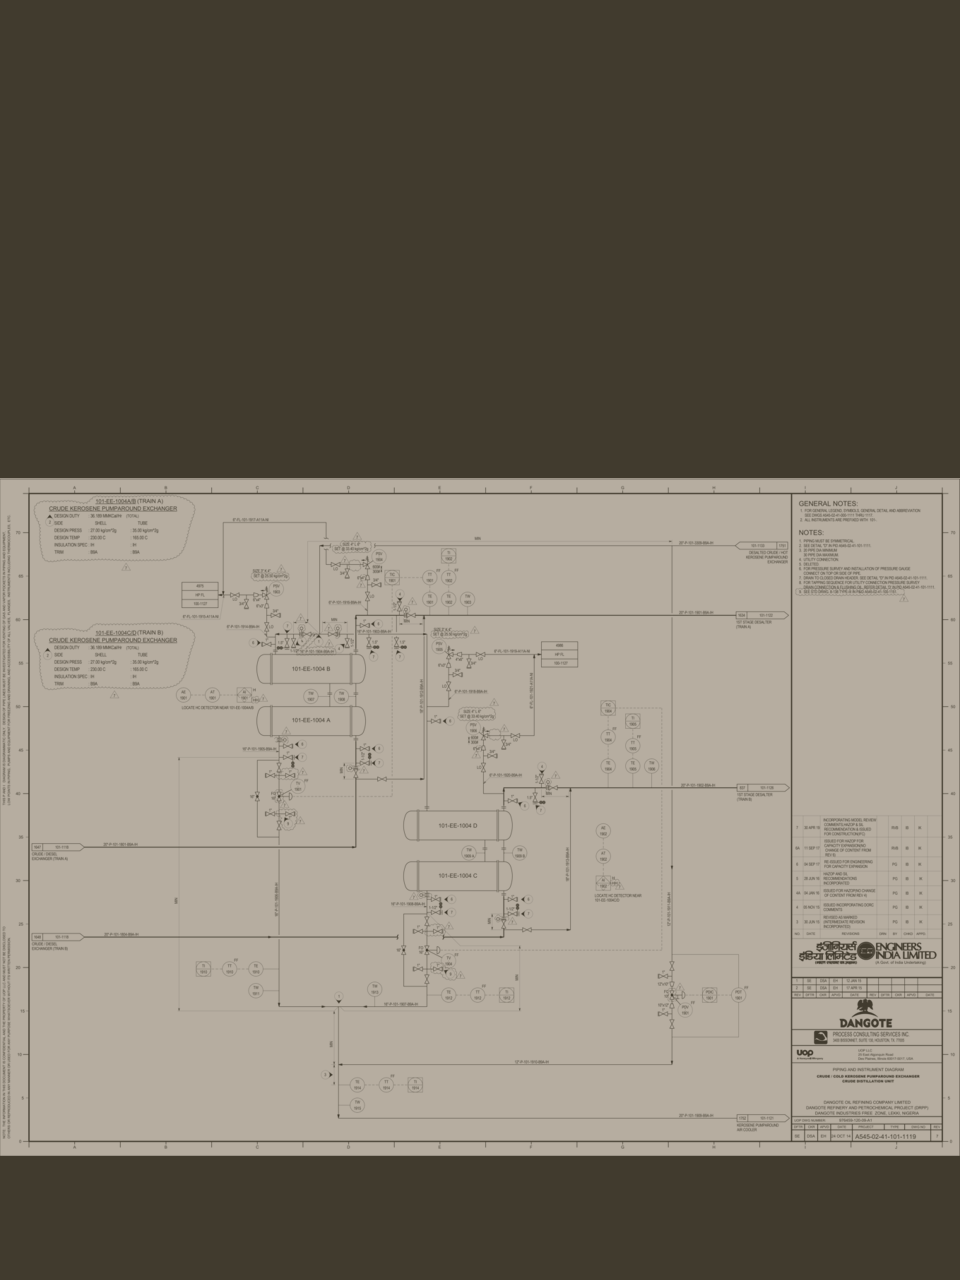

In [ ]:
from PIL import Image
import numpy as np

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# unnormalize
reconstructed_image = (batch['pixel_values'][0] * torch.tensor(std)[:, None, None]) + torch.tensor(mean)[:, None, None]
# unrescale
reconstructed_image = reconstructed_image * 255
# convert to numpy of shape HWC
reconstructed_image = torch.moveaxis(reconstructed_image, 0, -1)
image = Image.fromarray(reconstructed_image.numpy().astype(np.uint8))
image

In [ ]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids([''])[0]

In [ ]:

# sanity check
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <unk>


In [ ]:

import torch
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(10):
    print("Epoch:", epoch+1)
    model.train()
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]

        outputs = model(pixel_values=pixel_values,
                        labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print("Loss:", loss.item())


Epoch: 1


  0%|          | 0/240 [00:00<?, ?it/s]

198
Loss: 5.959573745727539
139
207
15
26
170
99
201
204
76
73
114
6
55
213
10
77
32
78
126
197
19
30
208
158
72
178
229
144
226
215
234
49
89
57
39
88
235
40
154
180
172
104
46
81
136
35
188
16
23
27
186
58
12
22
222
187
132
142
52
218
80
146
147
3
177
38
228
220
90
183
109
148
120
200
129
121
69
127
167
236


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (103114688 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


131
8
194
105
64
83
5
67
133
124
227
128
239
149
152
31
1
51
17
84
Loss: 0.3016875088214874
42
233
7
165
33
138
56
164
2
210
145
159
225
130
60
203
66
134
122
98
195
199
111
75
117
24
36
156
97
95
29
217
34
216
54
214
140
102
59
115
196
162
61
221
161
79
205
119
173
4
82
20
192
230
71
112
141
169
189
0
91
44
191
37
181
86
108
125
25
224
176
174
168
28
116
48
45
43
232
70
143
153
14
182
193
166
151
190
157
179
150
100
113
41
171
74
13
85
93
106
Loss: 0.005366298370063305
87
123
9
118
103
231
101
212
206
65
11
18
107
184
135
155
110
185
68
219
94
223
211
237
163
47
160
137
92
53
175
209
202
50
238
21
63
62
96
Epoch: 2


  0%|          | 0/240 [00:00<?, ?it/s]

25
Loss: 0.11341352760791779
102
137
228
130
40
141
155
171
29
182
143
208
168
158
72
189
118
127
226
7
61
103
76
121
75
201
216
186
3
147
150
14
198
9
90
148
123
8
99
88
120
196
163
200
194
205
199
202
64
185
50
161
207
6
56
220
91
34
210
59
5
213
197
157
89
219
113
204
17
71
139
98
233
178
100
111
176
55
24
215
23
79
114
101
27
218
133
77
149
151
87
180
65
47
221
169
105
97
58
41
Loss: 0.004350054077804089
227
172
108
19
67
117
162
46
86
66
39
174
81
4
144
10
230
212
126
209
32
231
238
165
63
1
134
206
11
129
82
68
125
52
164
54
83
73
225
124
2
20
28
18
184
232
160
188
175
37
85
132
177
179
26
192
235
94
69
95
191
181
153
36
187
48
112
203
159
224
31
78
53
51
84
173
223
80
110
234
142
156
229
214
96
239
42
115
211
222
22
195
70
128
21
140
49
138
57
44
Loss: 0.00428435206413269
193
236
119
136
16
33
122
0
170
62
145
116
217
93
104
190
131
13
107
60
183
35
30
106
166
237
154
167
135
12
74
45
152
38
146
109
43
92
15
Epoch: 3


  0%|          | 0/240 [00:00<?, ?it/s]

20
Loss: 0.002328922040760517
218
204
120
85
162
122
206
0
25
114
159
64
238
55
135
57
66
235
165
158
21
190
148
205
182
126
108
100
30
7
175
53
130
118
84
77
134
223
36
209
177
15
52
203
160
98
138
50
62
97
106
54
12
170
70
127
192
234
80
125
155
82
199
156
136
68
176
88
229
107
117
47
6
89
226
78
236
87
140
27
103
169
93
185
202
228
13
214
38
17
35
60
92
23
29
73
48
33
172
86
Loss: 0.1463659703731537
157
141
212
132
210
220
115
28
161
3
34
121
168
40
1
183
76
163
32
171
102
181
216
5
119
43
188
51
200
239
231
197
180
179
166
164
113
2
178
94
230
10
128
167
196
144
208
151
225
19
45
49
215
46
129
67
147
222
59
123
99
79
71
65
61
213
224
56
174
207
58
195
143
153
105
191
83
139
145
90
221
110
111
201
232
198
193
14
104
72
24
39
186
237
37
9
109
69
75
149
Loss: 0.09555750340223312
44
4
31
187
95
26
227
18
233
194
154
124
184
101
219
41
142
150
137
22
189
74
217
81
146
42
96
173
152
16
8
63
112
211
116
131
91
11
133
Epoch: 4


  0%|          | 0/240 [00:00<?, ?it/s]

230
Loss: 0.0037611660081893206
0
154
223
152
129
42
165
71
215
52
126
82
13
20
69
191
229
186
124
120
198
100
133
39
237
48
65
47
233
158
83
236
184
23
175
130
32
49
86
155
77
114
200
212
105
17
12
101
188
7
227
102
26
76
117
238
211
62
203
206
131
128
195
202
118
95
137
204
132
9
232
192
28
213
64
106
81
144
72
153
216
148
67
194
220
217
91
193
181
151
90
55
226
139
116
11
96
68
113
166
Loss: 0.0035160758998245
50
196
178
170
224
109
169
38
235
56
84
2
168
37
123
234
219
108
40
54
221
182
63
19
87
225
99
21
180
27
231
163
16
79
111
222
93
147
88
174
4
214
73
110
58
138
107
164
199
161
66
59
121
125
157
142
41
134
10
135
160
92
239
6
143
201
127
70
150
176
22
3
97
44
162
115
156
119
61
57
60
187
94
30
80
45
36
78
149
8
228
112
53
33
85
179
89
43
24
140
Loss: 0.10523711144924164
141
15
35
173
167
136
103
18
5
171
146
104
34
14
177
51
208
190
205
1
29
145
210
31
197
25
159
218
75
172
183
189
122
46
74
207
185
98
209
Epoch: 5


  0%|          | 0/240 [00:00<?, ?it/s]

189
Loss: 0.0007256268872879446
73
10
14
12
141
93
225
107
0
35
87
77
15
78
158
193
62
168
97
115
181
85
22
31
211
164
131
160
151
94
13
43
186
132
116
230
17
155
200
137
113
174
47
190
198
54
72
30
98
169
142
128
28
217
192
41
224
103
8
206
24
44
59
153
49
231
70
176
109
42
32
216
219
149
86
223
184
91
122
194
144
20
23
156
120
214
202
196
166
27
136
199
95
228
163
79
238
80
55
2
Loss: 0.0010187570005655289
64
154
157
213
110
3
118
226
129
222
127
66
125
36
100
187
183
234
58
75
171
170
74
133
173
215
29
146
161
45
195
178
121
81
152
26
179
106
204
239
101
188
71
38
99
180
96
209
53
140
205
124
18
232
16
139
138
212
218
130
11
126
63
52
220
114
84
105
89
235
172
83
147
210
145
25
177
46
69
134
60
67
227
68
148
117
39
21
34
4
191
112
237
123
208
76
135
221
185
33
Loss: 0.002508265431970358
102
48
229
57
207
6
9
233
143
1
162
5
167
197
236
108
175
203
182
159
19
111
51
82
61
90
56
37
7
40
150
92
50
104
65
165
88
119
201
Epoch: 6


  0%|          | 0/240 [00:00<?, ?it/s]

20
Loss: 0.3594054579734802
138
220
109
1
157
132
87
129
237
35
239
190
32
21
175
44
5
38
203
90
80
70
101
108
79
7
22
235
92
96
56
91
82
161
93
163
130
233
104
180
122
3
211
103
200
231
89
64
141
227
171
212
159
168
153
192
46
216
28
174
123
183
67
113
111
52
202
124
106
75
65
25
86
49
110
209
164
99
176
100
76
31
77
73
88
181
193
158
229
16
45
218
230
205
17
24
68
177
139
47
Loss: 0.0003249635628890246
210
69
41
144
145
121
4
112
136
201
182
196
187
223
78
51
59
62
11
236
208
9
173
204
34
74
140
98
188
54
160
215
228
149
84
18
43
151
170
222
2
195
117
131
57
134
133
166
102
71
167
19
232
127
12
199
198
85
143
116
128
234
185
225
53
81
72
238
66
137
221
36
60
119
107
115
214
40
155
10
146
125
26
42
142
55
30
8
58
39
48
83
191
172
184
213
156
120
152
226
Loss: 0.00020239524019416422
189
217
178
219
126
23
197
6
147
29
63
150
169
33
50
118
154
14
186
206
27
94
0
37
13
97
95
105
135
179
165
61
224
114
148
194
207
162
15
Epoch: 7


  0%|          | 0/240 [00:00<?, ?it/s]

223
Loss: 0.000668087974190712
26
40
182
140
21
80
35
123
185
171
236
176
122
164
45
12
155
9
72
175
179
50
10
74
119
81
136
118
33
214
139
77
78
121
148
186
227
129
87
44
104
163
112
192
145
53
177
71
63
116
209
212
22
115
43
224
165
82
47
174
52
178
194
66
216
18
2
75
120
54
8
150
38
62
230
170
30
193
142
0
215
181
161
132
234
73
11
17
20
191
127
158
124
4
32
84
76
162
153
144
Loss: 0.015353280119597912
23
146
238
131
138
128
101
90
152
154
141
160
110
96
228
86
88
55
226
109
180
157
97
229
46
149
69
201
172
213
225
159
15
6
64
207
237
107
91
68
48
99
231
95
27
111
202
114
222
61
29
98
42
79
16
126
221
14
167
19
65
195
196
198
57
218
25
210
184
7
204
169
85
89
31
56
220
125
203
206
41
36
105
51
189
28
102
117
168
5
197
232
39
133
205
70
24
135
211
58
Loss: 0.00048022897681221366
143
37
233
183
188
130
92
103
13
199
49
137
219
190
173
239
151
166
1
113
59
187
3
106
217
200
93
235
134
147
208
108
67
83
34
94
60
100
156
Epoch: 8


  0%|          | 0/240 [00:00<?, ?it/s]

220
Loss: 0.0004146013525314629
216
172
203
215
81
204
207
127
47
110
149
84
184
82
161
123
68
232
83
143
218
214
11
88
22
41
16
116
227
212
225
63
48
8
52
7
196
104
59
125
27
133
103
137
20
145
166
221
120
100
119
197
26
14
6
34
40
72
61
5
18
174
57
101
169
230
132
12
87
126
113
181
2
76
39
228
85
90
78
129
217
73
138
111
189
51
186
160
190
97
29
105
121
118
164
60
224
158
50
231
Loss: 0.0004994660266675055
210
183
142
180
170
44
45
238
58
42
198
32
71
64
114
112
141
205
69
128
139
153
191
206
134
193
106
233
21
222
75
80
135
175
176
19
35
146
168
187
229
147
236
148
91
178
99
9
38
167
154
17
151
1
28
67
219
223
31
96
152
177
182
107
94
102
79
211
33
195
156
122
15
185
25
98
155
208
10
46
165
162
234
163
171
62
124
0
140
109
115
117
173
194
136
202
77
55
92
201
Loss: 0.0006444206810556352
213
157
24
199
3
93
53
86
200
179
65
150
54
131
239
226
70
159
74
43
13
108
209
66
192
237
23
235
37
49
4
56
36
89
144
30
130
188
95
Epoch: 9


  0%|          | 0/240 [00:00<?, ?it/s]

104
Loss: 6.029303767718375e-05
148
211
109
238
110
190
22
85
80
4
106
59
200
51
236
120
185
208
28
44
209
34
170
78
30
69
187
32
233
214
48
136
19
126
186
131
223
43
35
161
25
239
129
150
197
2
219
139
179
79
41
49
53
18
97
9
145
146
195
23
91
119
189
125
230
130
153
47
159
204
65
222
1
56
142
75
71
158
17
207
114
135
164
213
166
160
101
231
201
61
37
157
72
13
73
95
128
216
149
20
Loss: 3.2512434700038284e-05
224
163
24
40
232
123
115
8
33
100
0
155
54
88
74
92
176
76
192
180
102
172
5
14
117
221
141
113
138
206
57
171
38
112
86
50
218
52
235
177
12
3
60
31
132
165
134
169
162
98
105
143
103
202
168
210
225
45
124
228
39
234
156
137
67
99
111
193
212
64
237
217
205
7
116
84
58
151
122
198
29
196
226
90
62
26
83
229
178
227
108
6
11
16
46
182
118
87
175
81
Loss: 0.01113886758685112
199
133
89
181
94
68
167
215
96
147
66
203
121
10
194
183
152
173
188
77
154
15
140
27
42
184
63
127
107
93
36
144
220
191
174
21
70
82
55
Epoch: 10


  0%|          | 0/240 [00:00<?, ?it/s]

22
Loss: 6.150675471872091e-05
47
30
221
139
233
162
136
146
79
144
137
8
111
85
185
123
5
9
56
71
235
155
131
194
35
28
86
68
39
64
63
98
66
60
188
75
205
62
48
182
19
225
124
227
81
96
51
129
202
31
170
65
219
104
116
186
158
91
169
93
13
113
171
176
89
12
34
95
218
156
0
7
97
110
11
152
164
187
236
179
197
198
217
107
183
54
102
119
161
220
23
159
206
83
74
148
16
167
173
230
Loss: 0.002756924834102392
223
150
140
157
191
92
58
190
154
38
15
118
41
134
172
232
234
174
114
207
78
226
46
59
90
125
44
163
201
50
143
2
70
45
209
72
213
10
180
109
26
29
69
214
100
33
212
17
149
208
20
94
215
142
108
36
135
189
32
211
1
121
204
101
105
222
18
52
177
80
49
76
192
228
145
82
128
37
151
127
112
229
231
193
224
122
40
53
4
166
106
42
132
237
130
6
238
88
61
168
Loss: 0.0066956947557628155
24
203
67
87
138
27
239
200
3
25
117
175
210
120
147
103
133
99
57
115
21
199
14
178
153
165
184
196
84
55
160
73
181
77
141
126
43
216
195


In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/LabellingImages/model_donut.pth')

##Loading Model:

In [ ]:
import torch

from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
from transformers import VisionEncoderDecoderConfig

max_length = 8
# image_size = [2560, 1920]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:190: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [ ]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids([''])[0]

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/LabellingImages/model_donut.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:

import re

model.eval()

dataset = toy_dataset['test']

output_list = []
accs = []
for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # print(idx)
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # print(pixel_values)
    # prepare decoder inputs
    batch_size=1
    decoder_input_ids = torch.full((batch_size, 1), model.config.decoder_start_token_id, device=device)
    # decoder_input_ids = decoder_input_ids.to(device)
    # print(decoder_input_ids)
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)
    # print(seq)
    ground_truth = json.loads(sample["ground_truth"])
    # print(ground_truth,seq)
    gt = ground_truth["gt_parse"]
    score = float(seq["text_sequence"] == gt["class"])
    print("Actual Class : ",gt['class'], " Predicted class : ", seq["text_sequence"])
    accs.append(score)

    output_list.append(seq)

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

  0%|          | 0/33 [00:00<?, ?it/s]

Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
Datasheet Datasheet
EngDwg EngDwg
EngDwg EngDwg
EngDwg EngDwg
EngDwg EngDwg
PnI EngDwg
PnI EngDwg
PnI EngDwg
EngDwg EngDwg
Datasheet EngDwg
PnI EngDwg
EngDwg EngDwg
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
PnI PnI
{'accuracies': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'mean_accuracy': 0.8484848484848485} length : 33


In [ ]:
torch.full((batch_size, 1), model.config.decoder_start_token_id, device=device)

tensor([[3]], device='cuda:0')

##Testing model:

In [ ]:
!unzip -d '/content/' '/content/drive/MyDrive/Datasheet_test.zip'

In [ ]:
import cv2
image = cv2.imread('/content/Datasheet_test/22960-1JM44-RFP05-JAC-D06-004_r1_v2.0.jpg')
print(image.shape)

(2806, 2016, 3)


In [ ]:
def model_test(image_path):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  image = cv2.imread(image_path)
  _image = np.array(image)
  image = torch.from_numpy(_image)
  image = image[np.newaxis, :]
  image = image.permute(0, 3, 1, 2)
  pixel_values = processor(image, return_tensors="pt").pixel_values

  batch_size=1
  decoder_input_ids = torch.full((batch_size, 1), model.config.decoder_start_token_id, device=device)

  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  outputs = model.generate(pixel_values.to(device),
                                decoder_input_ids=decoder_input_ids.to(device),
                                max_length=model.decoder.config.max_position_embeddings,
                                early_stopping=True,
                                pad_token_id=processor.tokenizer.pad_token_id,
                                eos_token_id=processor.tokenizer.eos_token_id,
                                use_cache=True,
                                num_beams=1,
                                bad_words_ids=[[processor.tokenizer.unk_token_id]],
                                return_dict_in_generate=True,
                                output_scores=True,)

  seq = processor.batch_decode(outputs.sequences)[0]
  seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
  seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
  seq = processor.token2json(seq)
  # print(seq)
  return seq

In [ ]:
import torch
import re
import cv2
import os
parent_path,_,files = next(os.walk('/content/Datasheet_test/'))
for file in files:
  print("File-name : ",file," ",model_test(parent_path+'/'+file))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:433: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


File-name :  22960-RF-MP0004-LAC-D05-002_r1_v2.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MBF002-MA-D03-012_r0_v1.1.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MP0008-XX-D05-001_r1_v2.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MP0004-LAC-D02-004_r0_v1.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MP0002-MAC-D02-004_r0_v1.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MP0011-XX-D05-001_r0_v1.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MBF002-MA-D03-015_r0_v1.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-RF-MP0011-XX-D05-002_r0_v1.0.jpg   {'text_sequence': 'Datasheet'}


KeyboardInterrupt: 

In [ ]:
parent_path,_,files = next(os.walk('/content/drive/MyDrive/Data/Test_Data/PnID/'))
for file in files:
  print("File-name : ",file," ",model_test(parent_path+'/'+file))

File-name :  22960-MT-J19007-D1JRF-SFFP01-BND-P-00-RF412-C02-0103_r1_v2.1.pdf(2).jpg   {'text_sequence': 'PnI'}
File-name :  22960-RF-MS0001-LAC-C02-003_rRR0_v3.1.pdf(0).jpg   {'text_sequence': 'PnI'}
File-name :  22960-JM1-7708218-414-C02-001_r2_v3.1.pdf(1).jpg   {'text_sequence': 'PnI'}
File-name :  22960-MT-J19007-D1JRF-MPP001-BND-P-00-RF412-C02-0001_r1_v2.1.pdf(1).jpg   {'text_sequence': 'PnI'}
File-name :  22960-JM2-7546184-412-C02-001_r0_v1.0.pdf(2).jpg   {'text_sequence': 'PnI'}
File-name :  22960-RF-MCT001-LAC-C02-002_rRR0_v7.1.pdf(0).jpg   {'text_sequence': 'PnI'}
File-name :  22960-RF-MBF002-MA-C02-002_rRR2_v4.1.pdf(0).jpg   {'text_sequence': 'PnI'}
File-name :  22960-JM2-7546184-412-C02-001_r0_v1.0.pdf(1).jpg   {'text_sequence': 'EngDwg'}
File-name :  22960-MT-J19007-D1JRF-SFFP01-BND-P-00-RF412-C02-0002_r5_v6.1.pdf(1).jpg   {'text_sequence': 'PnI'}
File-name :  22960-MT-J19007-D1JRF-SFFP01-BND-P-00-RF412-C02-0006_r5_v6.1.pdf(1).jpg   {'text_sequence': 'PnI'}
File-name :  229

In [ ]:
parent_path,_,files = next(os.walk('/content/drive/MyDrive/Data/Test_Data/EngDWG/'))
for file in files:
  print("File-name : ",file," ",model_test(parent_path+'/'+file))

File-name :  22960-1JE49-00001-MA-B02-007_r1_v2.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-MT-J19007-D1JRF-SFFP01-BND-P-00-RF412-D06-0701_r1_v2.1.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-MT-J21P07-D1JRF-MEA001-JEC-P-00-414-D06-001_r00_v1.2.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-MT-J21P07-D1JRF-MPP001-JEC-P-00-RF413-D06-0001_r01_v2.1 (1).jpg   {'text_sequence': 'PnI'}
File-name :  22960-ET-J19007-D1JRF-EAS001-BND-P-00-RF400-D02-0003_r0_v1.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-1JE49-00001-MA-B02-004_r1_v2.0.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-ET-J19007-D1JRF-EAS001-BND-P-00-RF400-D02-0003_r0_v1.1(1).jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-XM6-7407428-416-D06-001_r2_v3.jpg   {'text_sequence': 'PnI'}
File-name :  22960-1JE49-00001-MA-B02-003_r2_v3.0.jpg   {'text_sequence': 'PnI'}
File-name :  22960-1JE49-00001-MA-B02-005_r1_v2.0.pdf.jpg   {'text_sequence': 'Datasheet'}
File-name :  22960-1J